# Linear Regression



## 1. Linear Regression Basics

- y = ax+b
- x independent and y dependent variable
- a = slope, b = intersept
- a = co-efficient, b = bias/intercept

#### Goal of linear regression:
- minimize the distance between the point and the line (y=ax+b)

#### Note:
- Parameters refer to 
    - co-efficients in Linear Regression
    - weights in neural networks

In [ ]:
# For example go through the video 17. Linear Regression Introduction

## 2. Building Linear Regression Model

#### 2.1 Example
- Coefficient, a = 2
- Bias/Intercept, b = 1
- Equatio, y= 2x+1

In [74]:
import numpy as np
import matplotlib.pyplot as plt

import torch            ## for creating tensors
import torch.nn as nn   ## for modeling

from torch.autograd import Variable  ## make variable for enable gradients





#### 2.2 Building dataset

In [52]:
x_vals = [i for i in range(11)]
x_vals

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [53]:
# Convert to numpy
x_train = np.array(x_vals, dtype=np.float32)
x_train.shape

(11,)

In [54]:
# IMPORTANT: 2D arr required
x_train = x_train.reshape(-1, 1)  # (reshape(-1, 1) means, the second dimension will be 1 and for -1 it will auto calculate the dimension. Check: https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape)
x_train.shape

(11, 1)

##### y = 2x + 1

In [55]:
y_vals = [2*i+1 for i in x_vals]
y_vals

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [56]:
y_train = np.array(y_vals, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

#### 2.3 Building model

###### Linear model
- Equation: y= 2x + 1


###### Forward
- Example
    - Input, x = 1
    - Output, y<sup>^</sup> = ?

In [57]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__() # inherit everything from nn.Module
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return(out)
    
    

#### Instantiate Model Class
- input: [0, 1 .... 10]
- expected output: [1, 3 ..... 21]

In [1]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

NameError: name 'LinearRegressionModel' is not defined

#### Instantiate Loss Class
- MSE Loss: Mean Squared Error
- 1/n(sum(y<sup>^</sup> - y)) --> check video or google for exact equation
- Reason to use it for minimizing the distance between the point and the linear regression line


#### Cost Function/Loss Function/Optimizer
- A loss function tells us "How Good" our model is making predictions for a given set of parameters.

#### Gradient Descent
- An optimization algorithm used to get the minimum of the function, by iteratively moving to the direction of steepest descent by the negative of the gradient. 

In [59]:
criterion = nn.MSELoss()

#### Instantiate Optimizer Class

###### simpler equation
- parameters = parameters - learning_rate * parameters_gradients
    - parameters: a and b in y=ax+b
    - desired parameters: a=2 and b=1 in y=2x+1

###### What is the purpose fo the optimizer class
- Update the model's parameter at every iteration
- So that, we can get a better model to do the predictions
    
    
###### Need more clarification?
- Check at 11.00 min of the 18.Linear Regression video
    

In [60]:
learning_rate=0.01 # How fast we want the model to learn

optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate) # SGD is method of optimization, you need to use appropriate one for the specific data model

#### Train model
- 1 epoch: going through the whole x_train data once
    - 100 epochs:
        - 100x mapping x_train = [0, 1....10]
- Process
    - Convert inputs/labels to variables
    - Clear gradient buffets
    - Get output given inputs
    - Get loss
    - Get gradients w.r.t. parameters
    - Update parameters using gradients
        - parameters = parameters - learning_rate * parameters_gradients
    - REPEAT

In [61]:
epochs = 100

for epoch in range(epochs):
     # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train)) # actual/true output
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    # This output is based on the parameters we have
    outputs = model(inputs) # predicted output
    
    # Calculate loss
    # We need to know the loss to update the gradients
    loss = criterion(outputs, labels) # scalar loss
    
    # Getting gradients w.r.t parameters
    # Based on the scalar loss, we calculate the gradients (based on learning rate also)
    loss.backward()
    
    # Updating parameters
    # From the loss and newly calculated gradients we get the parameters for next epoch
    optimizer.step() 
    
    
    
    ##--------------------------------------------------------------------------
    ## WHY ARE NOT WE CLEARING THE GRADIENTS AT THE END? WHY AT THE BEGINING??
    ##--------------------------------------------------------------------------
    ## Clear gradients w.r.t. parameters
    ##  optimizer.zero_grad()
    ##--------------------------------------------------------------------------
    
    
    
    print('epoch: {}, loss: {}'.format(epoch+1, loss.data))
    
    

epoch: 1, loss: 317.64117431640625
epoch: 2, loss: 25.90899658203125
epoch: 3, loss: 2.113327980041504
epoch: 4, loss: 0.17238858342170715
epoch: 5, loss: 0.014072440564632416
epoch: 6, loss: 0.0011590584181249142
epoch: 7, loss: 0.00010563599789747968
epoch: 8, loss: 1.9572858946048655e-05
epoch: 9, loss: 1.2428176887624431e-05
epoch: 10, loss: 1.1726707271009218e-05
epoch: 11, loss: 1.1547555004653987e-05
epoch: 12, loss: 1.1415416338422801e-05
epoch: 13, loss: 1.1287880624877289e-05
epoch: 14, loss: 1.1162272130604833e-05
epoch: 15, loss: 1.1038300726795569e-05
epoch: 16, loss: 1.0914421181951184e-05
epoch: 17, loss: 1.079242974810768e-05
epoch: 18, loss: 1.0672162716218736e-05
epoch: 19, loss: 1.0552580533840228e-05
epoch: 20, loss: 1.0434920113766566e-05
epoch: 21, loss: 1.0317841770302039e-05
epoch: 22, loss: 1.0204078535025474e-05
epoch: 23, loss: 1.00901052064728e-05
epoch: 24, loss: 9.976291039492935e-06
epoch: 25, loss: 9.865040738077369e-06
epoch: 26, loss: 9.755302016856149

#### Compare data

In [64]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 1.0038348],
       [ 3.0032825],
       [ 5.0027304],
       [ 7.0021777],
       [ 9.001626 ],
       [11.001073 ],
       [13.000521 ],
       [14.999969 ],
       [16.999416 ],
       [18.998865 ],
       [20.998312 ]], dtype=float32)

In [65]:
# y = 2x + 1
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

#### Plot graph

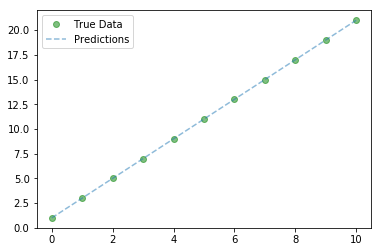

In [72]:
# Clear figures
plt.clf()

# Get predictions
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

# Plot the true data
plt.plot(x_train, y_train, 'go', label='True Data', alpha=0.5)

# Plot the predicted data
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)


# Plotting
plt.legend(loc='best')
plt.show()

#### Save model

In [73]:
# Remove the first 2 lines when you really want to save the model
save_model = False
if save_model is True:
    # Saves only the parameters (a and b)
    torch.save(model.state_dict(), 'linear_model.pkl')

#### Load model

In [ ]:
# Remove the first 2 lines when you really want to load the model
load_model = False
if load_model is True:
    model.load_state_dict(torch.load(linear_model.pkl))